In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import seaborn as sns

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss, ccf


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Take files from csv form
csv_energy = pd.read_csv('drive/MyDrive/Colab Notebooks/thesis/datasets/energy_dataset/energy_dataset.csv')
weather_csv = pd.read_csv('drive/MyDrive/Colab Notebooks/thesis/datasets/weather_features/weather_features.csv')

# Load data in Dataframe
energy_gen = pd.DataFrame(csv_energy) 
weather = pd.DataFrame(weather_csv)

In [ ]:
#Converting to datetime Series both Dataframes
energy_gen['time'] = pd.to_datetime(energy_gen['time'], utc=True, infer_datetime_format=True)
weather['time'] = pd.to_datetime(weather['dt_iso'], utc=True, infer_datetime_format=True)

In [ ]:
# Removing 2 columns because they are completely empty
energy_gen.drop(['generation hydro pumped storage aggregated', 'generation fossil coal-derived gas', 
                 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation marine', 'generation biomass',
                 'generation fossil brown coal/lignite', 'forecast wind offshore eday ahead'], axis=1, inplace=True)


In [ ]:
energy_gen.set_index('time', inplace=True)
energy_gen.interpolate(inplace=True)
energy_gen.reset_index('time', inplace=True)

In [ ]:
energy_gen.head()

,time,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
cities = weather['city_name'].unique()

grouped_cities = weather.groupby('city_name')


for city in cities:
  print('There are {}'.format(grouped_cities.get_group('{}'.format(city)).shape[0]), 
        ' observations for {}'.format(city))

There are 35145  observations for Valencia
There are 36267  observations for Madrid
There are 35951  observations for Bilbao
There are 35476  observations for  Barcelona
There are 35557  observations for Seville


In [ ]:
weather = weather.drop_duplicates(subset=['dt_iso', 'city_name'], keep='last')

In [ ]:
grouped_cities = weather.groupby('city_name')


for city in cities:
  print('There are {}'.format(grouped_cities.get_group('{}'.format(city)).shape[0]), 
        ' observations for {}'.format(city))

There are 35064  observations for Valencia
There are 35064  observations for Madrid
There are 35064  observations for Bilbao
There are 35064  observations for  Barcelona
There are 35064  observations for Seville


In [ ]:
# Replace outliers in 'pressure' with NaNs

weather.loc[weather.pressure > 1051, 'pressure'] = np.nan
weather.loc[weather.pressure < 931, 'pressure'] = np.nan


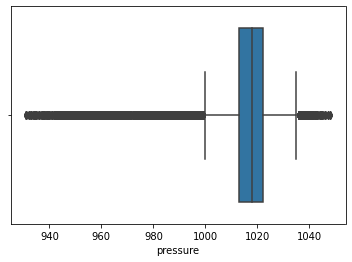

In [ ]:
sns.boxplot(x=weather['pressure'])
plt.show()


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175320 entries, 0 to 178395
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   dt_iso               175320 non-null  object             
 1   city_name            175320 non-null  object             
 2   temp                 175320 non-null  float64            
 3   temp_min             175320 non-null  float64            
 4   temp_max             175320 non-null  float64            
 5   pressure             174879 non-null  float64            
 6   humidity             175320 non-null  int64              
 7   wind_speed           175320 non-null  int64              
 8   wind_deg             175320 non-null  int64              
 9   rain_1h              175320 non-null  float64            
 10  rain_3h              175320 non-null  float64            
 11  snow_3h              175320 non-null  float64            
 12  cl

In [ ]:
weather.drop(['weather_icon', 'dt_iso', 'weather_id', 
                              'weather_description', 'weather_main'], axis=1, inplace=True)
weather.set_index('time', inplace=True)

In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175320 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city_name   175320 non-null  object 
 1   temp        175320 non-null  float64
 2   temp_min    175320 non-null  float64
 3   temp_max    175320 non-null  float64
 4   pressure    174879 non-null  float64
 5   humidity    175320 non-null  int64  
 6   wind_speed  175320 non-null  int64  
 7   wind_deg    175320 non-null  int64  
 8   rain_1h     175320 non-null  float64
 9   rain_3h     175320 non-null  float64
 10  snow_3h     175320 non-null  float64
 11  clouds_all  175320 non-null  int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 17.4+ MB


In [ ]:
weather.interpolate(method='linear', inplace=True, axis=0)

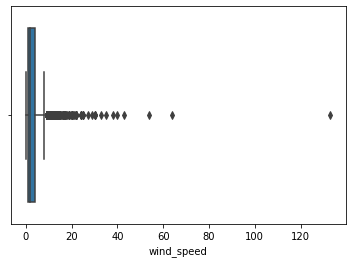

In [ ]:
sns.boxplot(x=weather['wind_speed'])
plt.show()


In [ ]:
weather.loc[weather.wind_speed > 50, 'wind_speed'] = np.nan

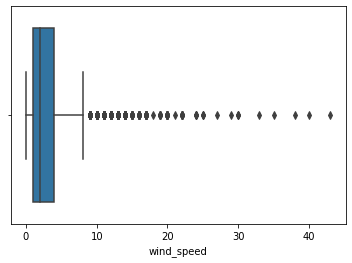

In [ ]:
sns.boxplot(x=weather['wind_speed'])
plt.show()


In [ ]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175320 entries, 2014-12-31 23:00:00+00:00 to 2018-12-31 22:00:00+00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city_name   175320 non-null  object 
 1   temp        175320 non-null  float64
 2   temp_min    175320 non-null  float64
 3   temp_max    175320 non-null  float64
 4   pressure    175320 non-null  float64
 5   humidity    175320 non-null  int64  
 6   wind_speed  175317 non-null  float64
 7   wind_deg    175320 non-null  int64  
 8   rain_1h     175320 non-null  float64
 9   rain_3h     175320 non-null  float64
 10  snow_3h     175320 non-null  float64
 11  clouds_all  175320 non-null  int64  
dtypes: float64(8), int64(3), object(1)
memory usage: 17.4+ MB


In [ ]:
weather.interpolate(method='linear', inplace=True)

In [ ]:
# Split the df_weather into 5 dataframes (one for each city)

df_1, df_2, df_3, df_4, df_5 = [x for _, x in weather.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]


In [ ]:
weather.shape

(175320, 12)

In [ ]:
# Generation solar Dataset
df_final = energy_gen[['time', 'generation solar']]

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    df_final = df_final.merge(df, on=['time'], how='outer')
    df_final = df_final.drop('city_name_{}'.format(city_str), axis=1)
    
df_final.columns

Index(['time', 'generation solar', 'temp_Barcelona', 'temp_min_Barcelona',
       'temp_max_Barcelona', 'pressure_Barcelona', 'humidity_Barcelona',
       'wind_speed_Barcelona', 'wind_deg_Barcelona', 'rain_1h_Barcelona',
       'rain_3h_Barcelona', 'snow_3h_Barcelona', 'clouds_all_Barcelona',
       'temp_Bilbao', 'temp_min_Bilbao', 'temp_max_Bilbao', 'pressure_Bilbao',
       'humidity_Bilbao', 'wind_speed_Bilbao', 'wind_deg_Bilbao',
       'rain_1h_Bilbao', 'rain_3h_Bilbao', 'snow_3h_Bilbao',
       'clouds_all_Bilbao', 'temp_Madrid', 'temp_min_Madrid',
       'temp_max_Madrid', 'pressure_Madrid', 'humidity_Madrid',
       'wind_speed_Madrid', 'wind_deg_Madrid', 'rain_1h_Madrid',
       'rain_3h_Madrid', 'snow_3h_Madrid', 'clouds_all_Madrid', 'temp_Seville',
       'temp_min_Seville', 'temp_max_Seville', 'pressure_Seville',
       'humidity_Seville', 'wind_speed_Seville', 'wind_deg_Seville',
       'rain_1h_Seville', 'rain_3h_Seville', 'snow_3h_Seville',
       'clouds_all_Seville',

In [ ]:
# Generation solar Dataset
df_final_wind_gen = energy_gen[['time', 'generation wind onshore']]

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    df_final_wind_gen = df_final_wind_gen.merge(df, on=['time'], how='outer')
    df_final_wind_gen = df_final_wind_gen.drop('city_name_{}'.format(city_str), axis=1)
    
df_final_wind_gen.columns

Index(['time', 'generation wind onshore', 'temp_Barcelona',
       'temp_min_Barcelona', 'temp_max_Barcelona', 'pressure_Barcelona',
       'humidity_Barcelona', 'wind_speed_Barcelona', 'wind_deg_Barcelona',
       'rain_1h_Barcelona', 'rain_3h_Barcelona', 'snow_3h_Barcelona',
       'clouds_all_Barcelona', 'temp_Bilbao', 'temp_min_Bilbao',
       'temp_max_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'wind_deg_Bilbao', 'rain_1h_Bilbao',
       'rain_3h_Bilbao', 'snow_3h_Bilbao', 'clouds_all_Bilbao', 'temp_Madrid',
       'temp_min_Madrid', 'temp_max_Madrid', 'pressure_Madrid',
       'humidity_Madrid', 'wind_speed_Madrid', 'wind_deg_Madrid',
       'rain_1h_Madrid', 'rain_3h_Madrid', 'snow_3h_Madrid',
       'clouds_all_Madrid', 'temp_Seville', 'temp_min_Seville',
       'temp_max_Seville', 'pressure_Seville', 'humidity_Seville',
       'wind_speed_Seville', 'wind_deg_Seville', 'rain_1h_Seville',
       'rain_3h_Seville', 'snow_3h_Seville', 'clouds_all_Se

In [ ]:
df_final

,time,generation solar,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,rain_3h_Barcelona,snow_3h_Barcelona,clouds_all_Barcelona,temp_Bilbao,temp_min_Bilbao,temp_max_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,rain_3h_Bilbao,snow_3h_Bilbao,clouds_all_Bilbao,temp_Madrid,temp_min_Madrid,temp_max_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,rain_3h_Madrid,snow_3h_Madrid,clouds_all_Madrid,temp_Seville,temp_min_Seville,temp_max_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,rain_3h_Seville,snow_3h_Seville,clouds_all_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,rain_3h_Valencia,snow_3h_Valencia,clouds_all_Valencia
0,2014-12-31 23:00:00+00:00,49.0,281.625,281.625,281.625,1035.0,100,7.0,58,0.0,0.0,0.0,0,269.657312,269.657312,269.657312,1036.0,97,0.0,226,0.0,0.0,0.0,0,267.325,267.325,267.325,971.0,63,1.0,309,0.0,0.0,0.0,0,273.375,273.375,273.375,1039.0,75,1.0,21,0.0,0.0,0.0,0,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0.0,0
1,2015-01-01 00:00:00+00:00,50.0,281.625,281.625,281.625,1035.0,100,7.0,58,0.0,0.0,0.0,0,269.763500,269.763500,269.763500,1035.0,97,0.0,229,0.0,0.0,0.0,0,267.325,267.325,267.325,971.0,63,1.0,309,0.0,0.0,0.0,0,273.375,273.375,273.375,1039.0,75,1.0,21,0.0,0.0,0.0,0,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0.0,0
2,2015-01-01 01:00:00+00:00,50.0,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0.0,0,269.251688,269.251688,269.251688,1036.0,97,1.0,224,0.0,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0.0,0
3,2015-01-01 02:00:00+00:00,50.0,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0.0,0,269.203344,269.203344,269.203344,1035.0,97,1.0,225,0.0,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0.0,0
4,2015-01-01 03:00:00+00:00,42.0,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0.0,0,269.485500,269.485500,269.485500,1035.0,97,1.0,221,0.0,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2018-12-31 18:00:00+00:00,85.0,284.130,282.150,286.150,1027.0,71,1.0,250,0.0,0.0,0.0,0,281.260000,280.150000,282.150000,1033.0,93,0.0,57,0.0,0.0,0.0,0,283.560,282.150,285.150,1030.0,88,1.0,280,0.0,0.0,0.0,0,287.760,287.150,288.150,1028.0,54,3.0,30,0.0,0.0,0.0,0,285.640,285.150,286.150,1028.0,62,2.0,140,0.0,0.0,0.0,0
35060,2018-12-31 19:00:00+00:00,33.0,282.640,281.150,284.150,1027.0,62,3.0,270,0.0,0.0,0.0,0,279.810000,278.150000,281.150000,1034.0,93,1.0,0,0.0,0.0,0.0,0,280.120,278.150,281.150,1031.0,52,1.0,260,0.0,0.0,0.0,0,285.760,285.150,286.150,1029.0,62,3.0,30,0.0,0.0,0.0,0,283.140,282.150,284.150,1029.0,71,1.0,242,0.0,0.0,0.0,0
35061,2018-12-31 20:00:00+00:00,31.0,282.140,280.150,284.150,1028.0,53,4.0,300,0.0,0.0,0.0,0,277.150000,277.150000,277.150000,1034.0,100,1.0,140,0.0,0.0,0.0,0,278.150,278.150,278.150,1030.0,65,1.0,340,0.0,0.0,0.0,0,285.150,285.150,285.150,1028.0,58,4.0,50,0.0,0.0,0.0,0,281.660,281.150,282.150,1029.0,81,3.0,300,0.0,0.0,0.0,0
35062,2018-12-31 21:00:00+00:00,31.0,281.130,278.150,284.150,1028.0,50,5.0,320,0.0,0.0,0.0,0,276.600000,276.150000,277.150000,1034.0,93,1.0,120,0.0,0.0,0.0,0,276.570,276.150,277.150,1031.0,69,2.0,340,0.0,0.0,0.0,0,284.150,284.150,284.150,1029.0,5

In [ ]:
# copyright from kaggle datasets constributors
# https://www.kaggle.com/dimitriosroussis/electricity-price-forecasting-with-dnns-eda

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


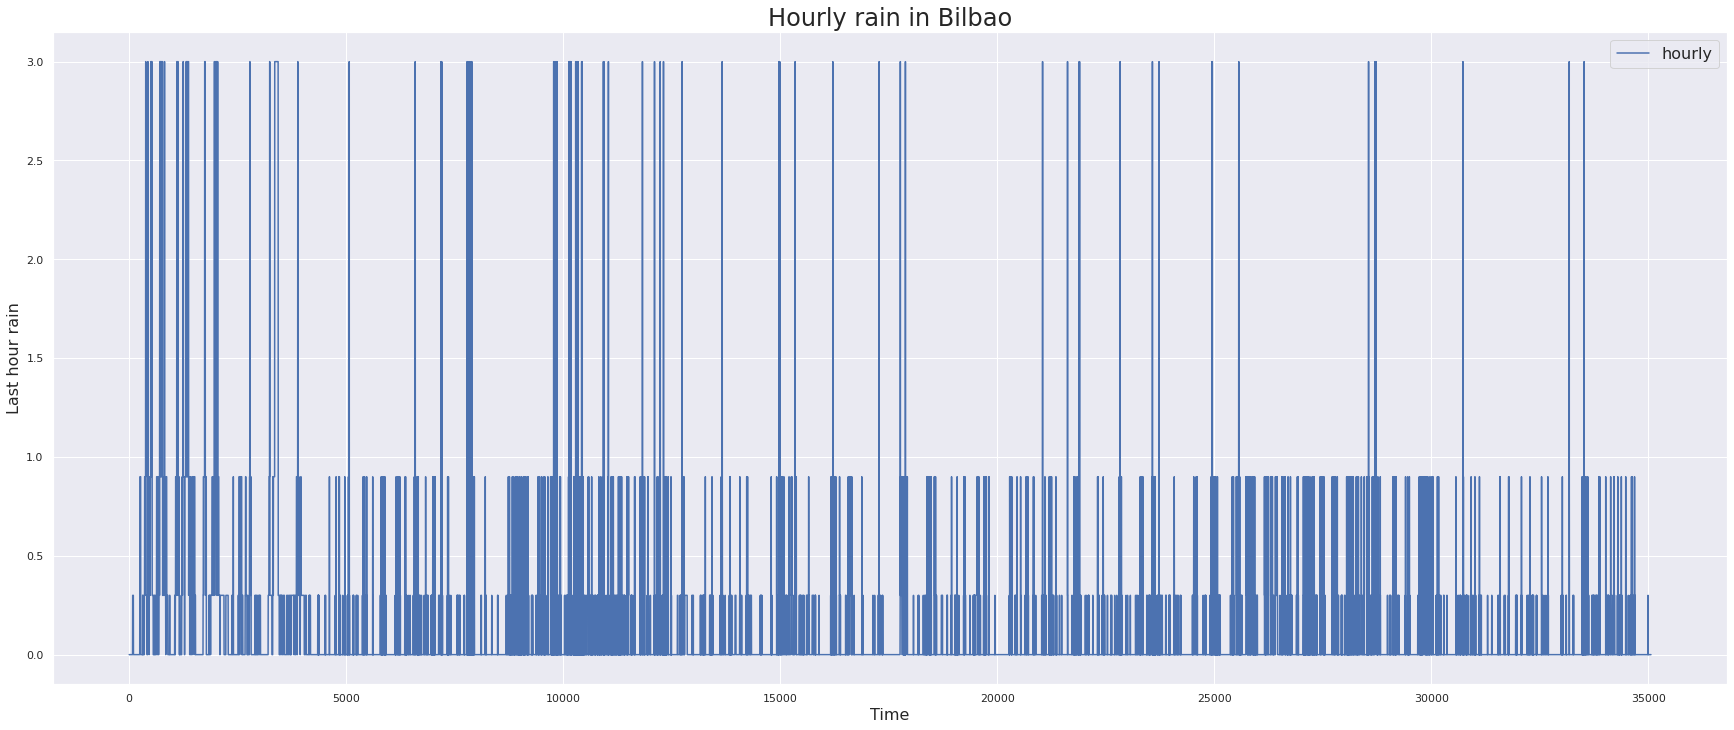

In [ ]:
plot_series(df_final, 'rain_1h_Bilbao', label='hourly', ylabel='Last hour rain', title='Hourly rain in Bilbao')

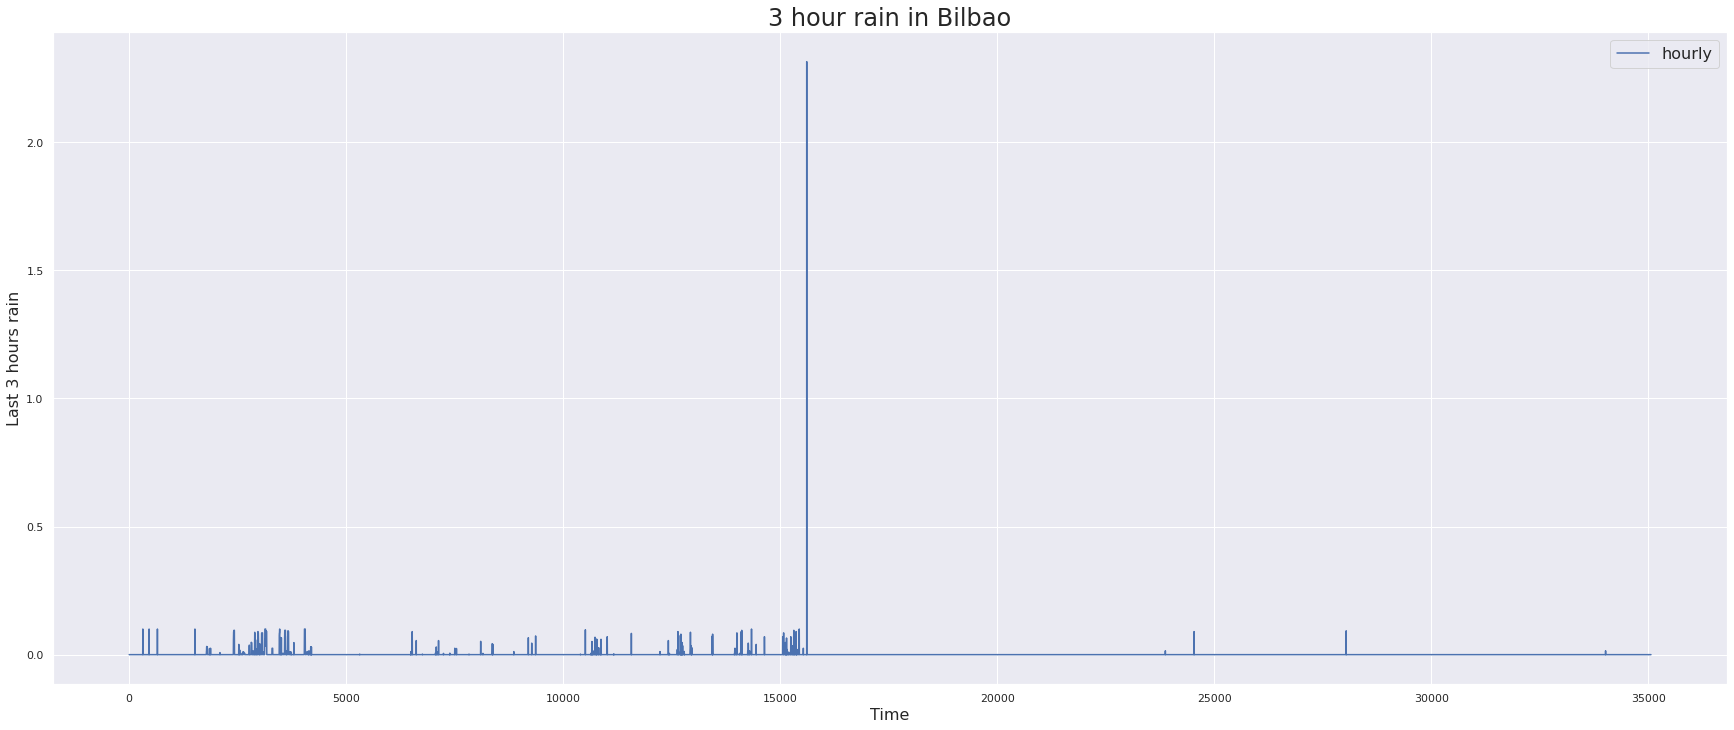

In [ ]:
plot_series(df_final, 'rain_3h_Bilbao', label='hourly', ylabel='Last 3 hours rain', title='3 hour rain in Bilbao')

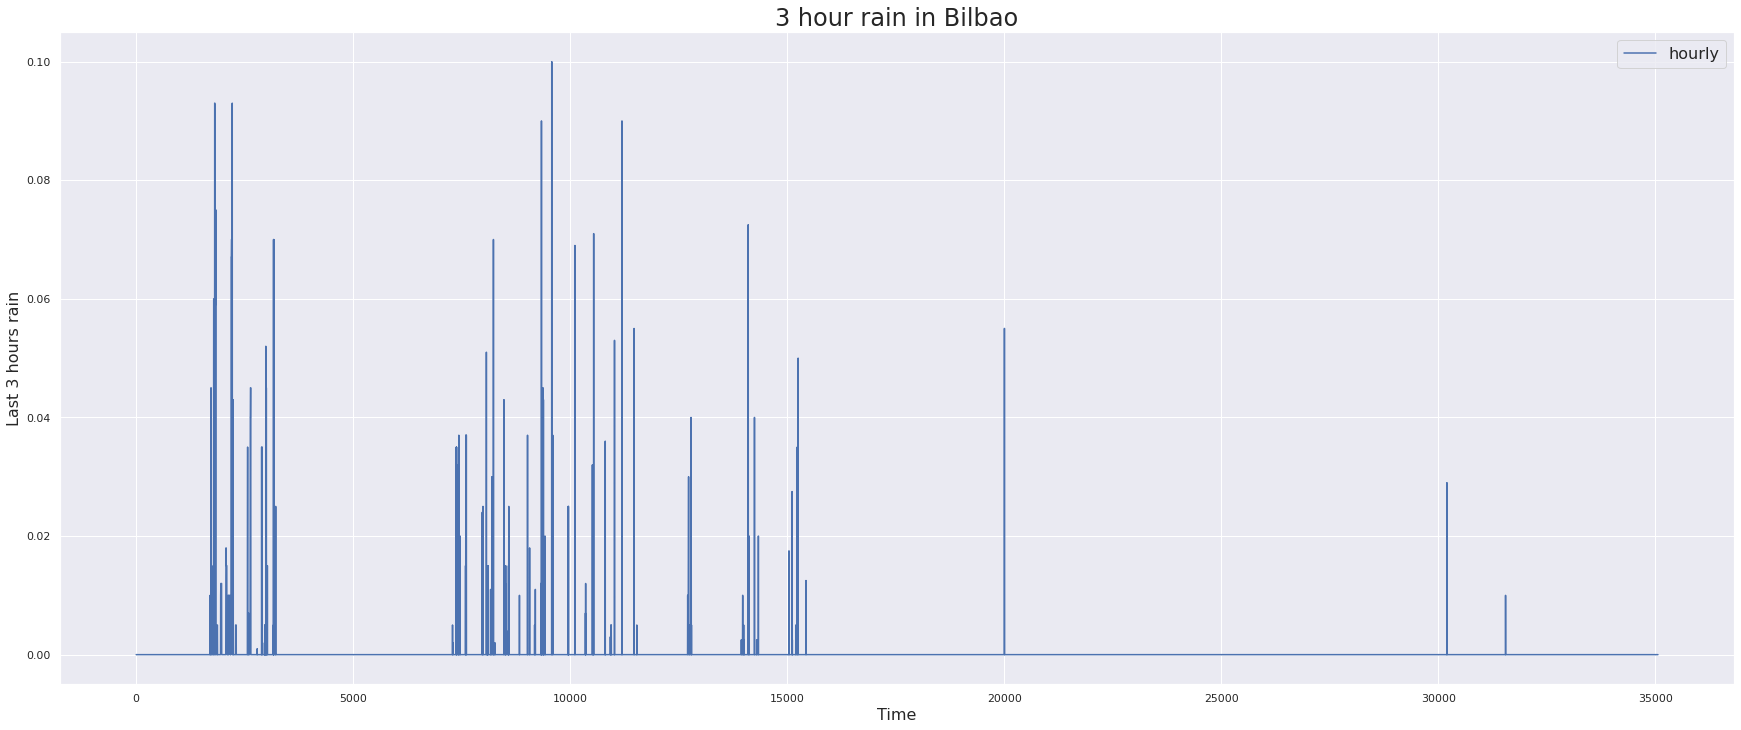

In [ ]:
plot_series(df_final, 'rain_3h_Barcelona', label='hourly', ylabel='Last 3 hours rain', title='3 hour rain in Bilbao')

In [ ]:
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for city in cities:
    df_final = df_final.drop(['rain_3h_{}'.format(city)], axis=1)
    df_final_wind_gen = df_final_wind_gen.drop(['rain_3h_{}'.format(city)], axis=1)

In [ ]:
energy_gen.set_index('time', inplace=True)

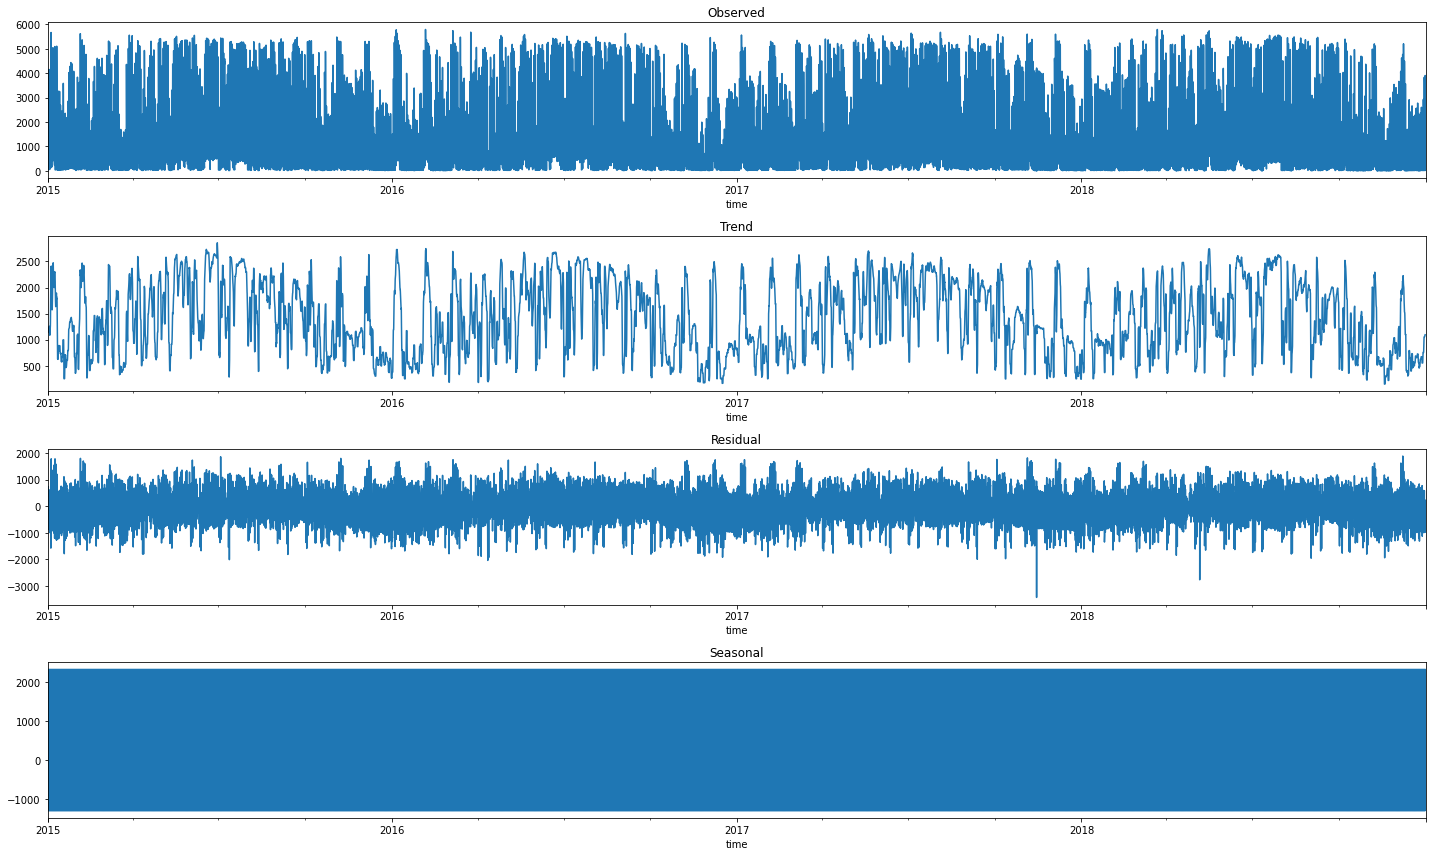

In [ ]:
# Decompose the generaion time series

res = sm.tsa.seasonal_decompose(energy_gen['generation solar'], model='additive')

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 12))
res.observed.plot(ax=ax1, title='Observed')
res.trend.plot(ax=ax2, title='Trend')
res.resid.plot(ax=ax3, title='Residual')
res.seasonal.plot(ax=ax4, title='Seasonal')
plt.tight_layout()
plt.show()


In [ ]:
energy_gen.head()

,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 00:00:00+00:00,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 01:00:00+00:00,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 02:00:00+00:00,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 03:00:00+00:00,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [ ]:
y = df_final['generation solar']
adf_test = adfuller(y, regression='c')
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0], adf_test[1], adf_test[2]))
for key, value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

ADF Statistic: -13.879660
p-value: 0.000000
#Lags used: 52
Critical Value (1%): -3.430537
Critical Value (5%): -2.861623
Critical Value (10%): -2.566814


In [ ]:
kpss_test = kpss(y, regression='c')
print('KPSS Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(kpss_test[0], kpss_test[1], kpss_test[2]))
for key, value in kpss_test[3].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))


KPSS Statistic: 0.476897
p-value: 0.046870
#Lags used: 52
Critical Value (10%): 0.347000
Critical Value (5%): 0.463000
Critical Value (2.5%): 0.574000
Critical Value (1%): 0.739000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


In [ ]:
kpss_test = kpss(y, regression='ct')
print('KPSS Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(kpss_test[0], kpss_test[1], kpss_test[2]))
for key, value in kpss_test[3].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))


KPSS Statistic: 0.376526
p-value: 0.010000
#Lags used: 52
Critical Value (10%): 0.119000
Critical Value (5%): 0.146000
Critical Value (2.5%): 0.176000
Critical Value (1%): 0.216000


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)


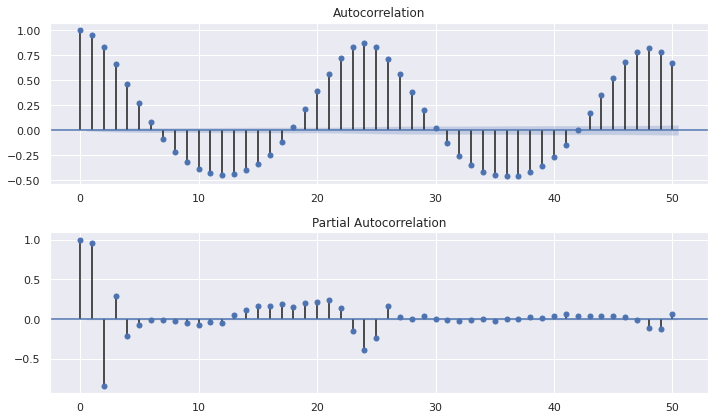

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plot_acf(df_final['generation solar'], lags=50, ax=ax1)
plot_pacf(df_final['generation solar'], lags=50, ax=ax2)
plt.tight_layout()
plt.show()


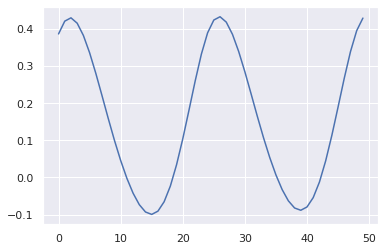

In [ ]:
cross_corr = ccf(df_final['temp_Barcelona'], df_final['generation solar'])
plt.plot(cross_corr[0:50])
plt.show()

In [ ]:
df_final.head()

,time,generation solar,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,snow_3h_Barcelona,clouds_all_Barcelona,temp_Bilbao,temp_min_Bilbao,temp_max_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,snow_3h_Bilbao,clouds_all_Bilbao,temp_Madrid,temp_min_Madrid,temp_max_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,snow_3h_Madrid,clouds_all_Madrid,temp_Seville,temp_min_Seville,temp_max_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,snow_3h_Seville,clouds_all_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia
0,2014-12-31 23:00:00+00:00,49.0,281.625,281.625,281.625,1035.0,100,7.0,58,0.0,0.0,0,269.657312,269.657312,269.657312,1036.0,97,0.0,226,0.0,0.0,0,267.325,267.325,267.325,971.0,63,1.0,309,0.0,0.0,0,273.375,273.375,273.375,1039.0,75,1.0,21,0.0,0.0,0,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0
1,2015-01-01 00:00:00+00:00,50.0,281.625,281.625,281.625,1035.0,100,7.0,58,0.0,0.0,0,269.763500,269.763500,269.763500,1035.0,97,0.0,229,0.0,0.0,0,267.325,267.325,267.325,971.0,63,1.0,309,0.0,0.0,0,273.375,273.375,273.375,1039.0,75,1.0,21,0.0,0.0,0,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0
2,2015-01-01 01:00:00+00:00,50.0,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0,269.251688,269.251688,269.251688,1036.0,97,1.0,224,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0
3,2015-01-01 02:00:00+00:00,50.0,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0,269.203344,269.203344,269.203344,1035.0,97,1.0,225,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0
4,2015-01-01 03:00:00+00:00,42.0,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0,269.485500,269.485500,269.485500,1035.0,97,1.0,221,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0


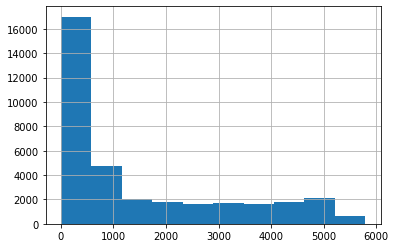

In [ ]:
df_final['generation solar'].hist()

In [ ]:
df_final.head()

,time,generation solar,temp_Barcelona,temp_min_Barcelona,temp_max_Barcelona,pressure_Barcelona,humidity_Barcelona,wind_speed_Barcelona,wind_deg_Barcelona,rain_1h_Barcelona,snow_3h_Barcelona,clouds_all_Barcelona,temp_Bilbao,temp_min_Bilbao,temp_max_Bilbao,pressure_Bilbao,humidity_Bilbao,wind_speed_Bilbao,wind_deg_Bilbao,rain_1h_Bilbao,snow_3h_Bilbao,clouds_all_Bilbao,temp_Madrid,temp_min_Madrid,temp_max_Madrid,pressure_Madrid,humidity_Madrid,wind_speed_Madrid,wind_deg_Madrid,rain_1h_Madrid,snow_3h_Madrid,clouds_all_Madrid,temp_Seville,temp_min_Seville,temp_max_Seville,pressure_Seville,humidity_Seville,wind_speed_Seville,wind_deg_Seville,rain_1h_Seville,snow_3h_Seville,clouds_all_Seville,temp_Valencia,temp_min_Valencia,temp_max_Valencia,pressure_Valencia,humidity_Valencia,wind_speed_Valencia,wind_deg_Valencia,rain_1h_Valencia,snow_3h_Valencia,clouds_all_Valencia
0,2014-12-31 23:00:00+00:00,49.0,281.625,281.625,281.625,1035.0,100,7.0,58,0.0,0.0,0,269.657312,269.657312,269.657312,1036.0,97,0.0,226,0.0,0.0,0,267.325,267.325,267.325,971.0,63,1.0,309,0.0,0.0,0,273.375,273.375,273.375,1039.0,75,1.0,21,0.0,0.0,0,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0
1,2015-01-01 00:00:00+00:00,50.0,281.625,281.625,281.625,1035.0,100,7.0,58,0.0,0.0,0,269.763500,269.763500,269.763500,1035.0,97,0.0,229,0.0,0.0,0,267.325,267.325,267.325,971.0,63,1.0,309,0.0,0.0,0,273.375,273.375,273.375,1039.0,75,1.0,21,0.0,0.0,0,270.475,270.475,270.475,1001.0,77,1.0,62,0.0,0.0,0
2,2015-01-01 01:00:00+00:00,50.0,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0,269.251688,269.251688,269.251688,1036.0,97,1.0,224,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0
3,2015-01-01 02:00:00+00:00,50.0,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0,269.203344,269.203344,269.203344,1035.0,97,1.0,225,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0
4,2015-01-01 03:00:00+00:00,42.0,281.286,281.286,281.286,1036.0,100,7.0,48,0.0,0.0,0,269.485500,269.485500,269.485500,1035.0,97,1.0,221,0.0,0.0,0,266.186,266.186,266.186,971.0,64,1.0,273,0.0,0.0,0,274.086,274.086,274.086,1039.0,71,3.0,27,0.0,0.0,0,269.686,269.686,269.686,1002.0,78,0.0,23,0.0,0.0,0


In [ ]:
df_final = df_final.drop(['snow_3h_Barcelona', 'snow_3h_Seville', 'snow_3h_Bilbao', 'snow_3h_Madrid', 'snow_3h_Valencia'], axis=1)

In [ ]:
df_final.set_index('time', inplace=True)
for i in range(len(df_final)):
    position = df_final.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    df_final.loc[position, 'hour'] = hour
    df_final.loc[position, 'weekday'] = weekday
    df_final.loc[position, 'month'] = month

In [ ]:
df_final.head()

In [ ]:
test_sample = 31000

x_train = df_final.iloc[:test_sample,1:].values
y_train = df_final.iloc[:test_sample, 0].values

x_test = df_final.iloc[test_sample:,1:].values
y_test = df_final.iloc[test_sample:,0].values

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import accuracy_score, f1_score

# DECISION TREE REGRESSOR

dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)

predictions = dec_tree.predict(x_test)
print("Mean absolute error: ", np.mean(np.abs(predictions - y_test)))


Mean absolute error:  628.9900344488188


In [ ]:
# Decision trees with peak col

dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train[:,:-1], y_train)

predictions = dec_tree.predict(x_test[:,:-1])
print("Mean absolute error: ", np.mean(np.abs(predictions - y_test)))


Mean absolute error:  649.089654808774


In [ ]:
x_line = np.arange(predictions.size)

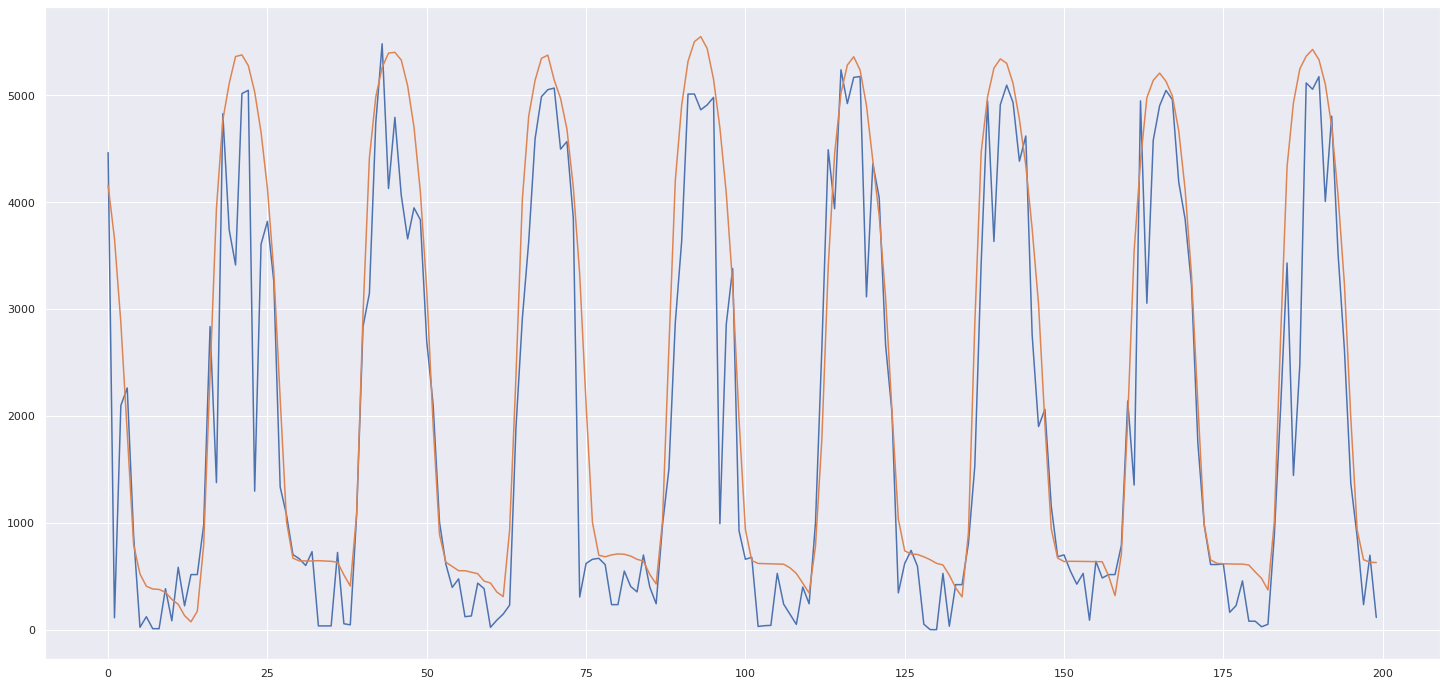

In [ ]:
time_lag = 200
plt.figure(figsize=(25,12))
plt.plot(x_line[:time_lag], predictions[:time_lag])
plt.plot(x_line[:time_lag], y_test[:time_lag])

In [ ]:
new_weather = weather[['city_name', 'temp', 'pressure', 'humidity', 'rain_1h', 'clouds_all']].copy()

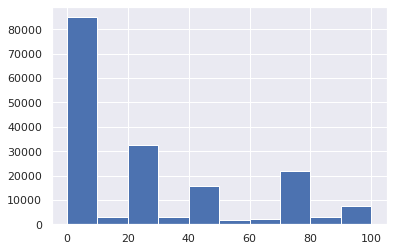

In [ ]:
(weather['clouds_all']).hist()

In [ ]:
# Split the df_weather into 5 dataframes (one for each city)

df_1, df_2, df_3, df_4, df_5 = [x for _, x in new_weather.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]

df_final_new = energy_gen.reset_index()[['time', 'generation solar']]

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    df_final_new = df_final_new.merge(df, on=['time'], how='outer')
    df_final_new = df_final_new.drop('city_name_{}'.format(city_str), axis=1)
    
df_final_new.columns

In [ ]:
# Adding hour, weekday, month cols
df_final_new.set_index('time', inplace=True)
for i in range(len(df_final_new)):
    position = df_final_new.index[i]
    hour = position.hour
    weekday = position.weekday()
    month = position.month
    df_final_new.loc[position, 'hour'] = hour
    df_final_new.loc[position, 'weekday'] = weekday
    df_final_new.loc[position, 'month'] = month

In [ ]:
# Adding peak col
for i in range(len(df_final_new)):
  position = df_final_new.index[i]
  if df_final_new.loc[position,'hour'] >= 10.0 and df_final_new.loc[position,'hour'] <= 15.0:
    df_final_new.loc[position, 'peak'] = 1.0
  else:
    df_final_new.loc[position, 'peak'] = 0.0

In [ ]:
df_final_new.head()

,generation solar,temp_Barcelona,pressure_Barcelona,humidity_Barcelona,rain_1h_Barcelona,clouds_all_Barcelona,temp_Bilbao,pressure_Bilbao,humidity_Bilbao,rain_1h_Bilbao,clouds_all_Bilbao,temp_Madrid,pressure_Madrid,humidity_Madrid,rain_1h_Madrid,clouds_all_Madrid,temp_Seville,pressure_Seville,humidity_Seville,rain_1h_Seville,clouds_all_Seville,temp_Valencia,pressure_Valencia,humidity_Valencia,rain_1h_Valencia,clouds_all_Valencia,hour,weekday,month,peak
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2014-12-31 23:00:00+00:00,49.0,281.625,1035.0,100,0.0,0,269.657312,1036.0,97,0.0,0,267.325,971.0,63,0.0,0,273.375,1039.0,75,0.0,0,270.475,1001.0,77,0.0,0,23.0,2.0,12.0,0.0
2015-01-01 00:00:00+00:00,50.0,281.625,1035.0,100,0.0,0,269.763500,1035.0,97,0.0,0,267.325,971.0,63,0.0,0,273.375,1039.0,75,0.0,0,270.475,1001.0,77,0.0,0,0.0,3.0,1.0,0.0
2015-01-01 01:00:00+00:00,50.0,281.286,1036.0,100,0.0,0,269.251688,1036.0,97,0.0,0,266.186,971.0,64,0.0,0,274.086,1039.0,71,0.0,0,269.686,1002.0,78,0.0,0,1.0,3.0,1.0,0.0
2015-01-01 02:00:00+00:00,50.0,281.286,1036.0,100,0.0,0,269.203344,1035.0,97,0.0,0,266.186,971.0,64,0.0,0,274.086,1039.0,71,0.0,0,269.686,1002.0,78,0.0,0,2.0,3.0,1.0,0.0
2015-01-01 03:00:00+00:00,42.0,281.286,1036.0,100,0.0,0,269.485500,1035.0,97,0.0,0,266.186,971.0,64,0.0,0,274.086,1039.0,71,0.0,0,269.686,1002.0,78,0.0,0,3.0,3.0,1.0,0.0


In [ ]:
def split_test_train(df, test_sample = 31000):

  x_train = df.iloc[:test_sample,1:].values
  y_train = df.iloc[:test_sample, 0].values

  x_test = df.iloc[test_sample:,1:].values
  y_test = df.iloc[test_sample:,0].values

  return x_train, y_train, x_test, y_test

In [ ]:
x_train, y_train, x_test, y_test = split_test_train(df_final_new)

In [ ]:
dec_tree = DecisionTreeRegressor(max_depth=100)
dec_tree.fit(x_train, y_train)

predictions = dec_tree.predict(x_test)

In [ ]:
np.mean(np.abs(predictions - y_test))

625.6023622047244

Text(0, 0.5, 'Power Generation')

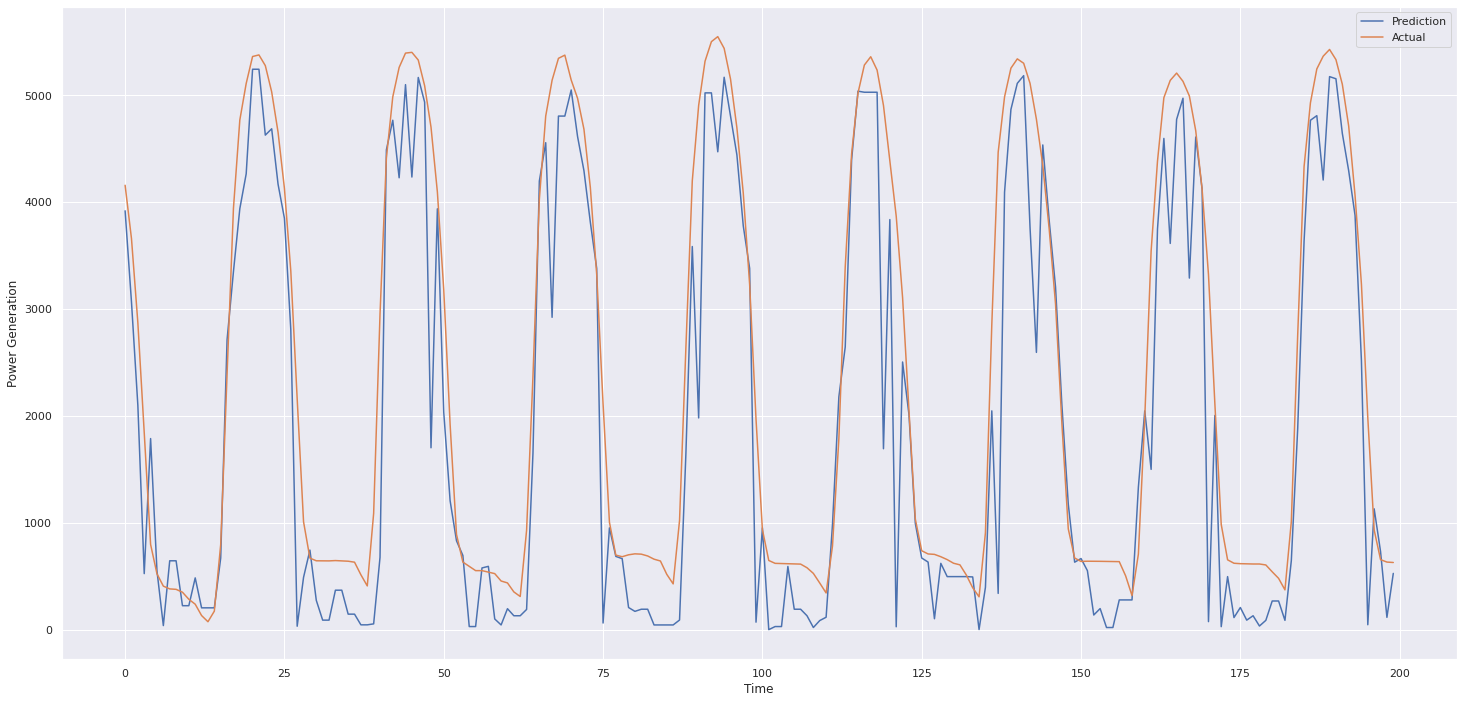

In [ ]:
plt.figure(figsize=(25,12))
plt.plot(x_line[:time_lag], predictions[:time_lag])
plt.plot(x_line[:time_lag], y_test[:time_lag])
plt.legend(['Prediction', 'Actual'])

plt.xlabel('Time')
plt.ylabel('Power Generation') 


In [ ]:
rand_forest = RandomForestRegressor(n_estimators=250)
rand_forest.fit(x_train, y_train)

predictions = rand_forest.predict(x_test)

np.mean(np.abs(predictions - y_test))

480.8954829865017

In [ ]:
# Importance of the model

importances = list(rand_forest.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_final_new.iloc[:,1:].columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

feature_importances

[('peak', 0.5),
 ('hour', 0.2),
 ('humidity_Madrid', 0.04),
 ('temp_Valencia', 0.04),
 ('temp_Madrid', 0.02),
 ('temp_Seville', 0.02),
 ('humidity_Seville', 0.02),
 ('humidity_Valencia', 0.02),
 ('month', 0.02),
 ('temp_Barcelona', 0.01),
 ('pressure_Barcelona', 0.01),
 ('humidity_Barcelona', 0.01),
 ('clouds_all_Barcelona', 0.01),
 ('temp_Bilbao', 0.01),
 ('pressure_Bilbao', 0.01),
 ('humidity_Bilbao', 0.01),
 ('clouds_all_Bilbao', 0.01),
 ('pressure_Madrid', 0.01),
 ('clouds_all_Madrid', 0.01),
 ('pressure_Seville', 0.01),
 ('clouds_all_Seville', 0.01),
 ('pressure_Valencia', 0.01),
 ('clouds_all_Valencia', 0.01),
 ('weekday', 0.01),
 ('rain_1h_Barcelona', 0.0),
 ('rain_1h_Bilbao', 0.0),
 ('rain_1h_Madrid', 0.0),
 ('rain_1h_Seville', 0.0),
 ('rain_1h_Valencia', 0.0)]

In [ ]:
time_lag=200

Text(0, 0.5, 'Power Generation')

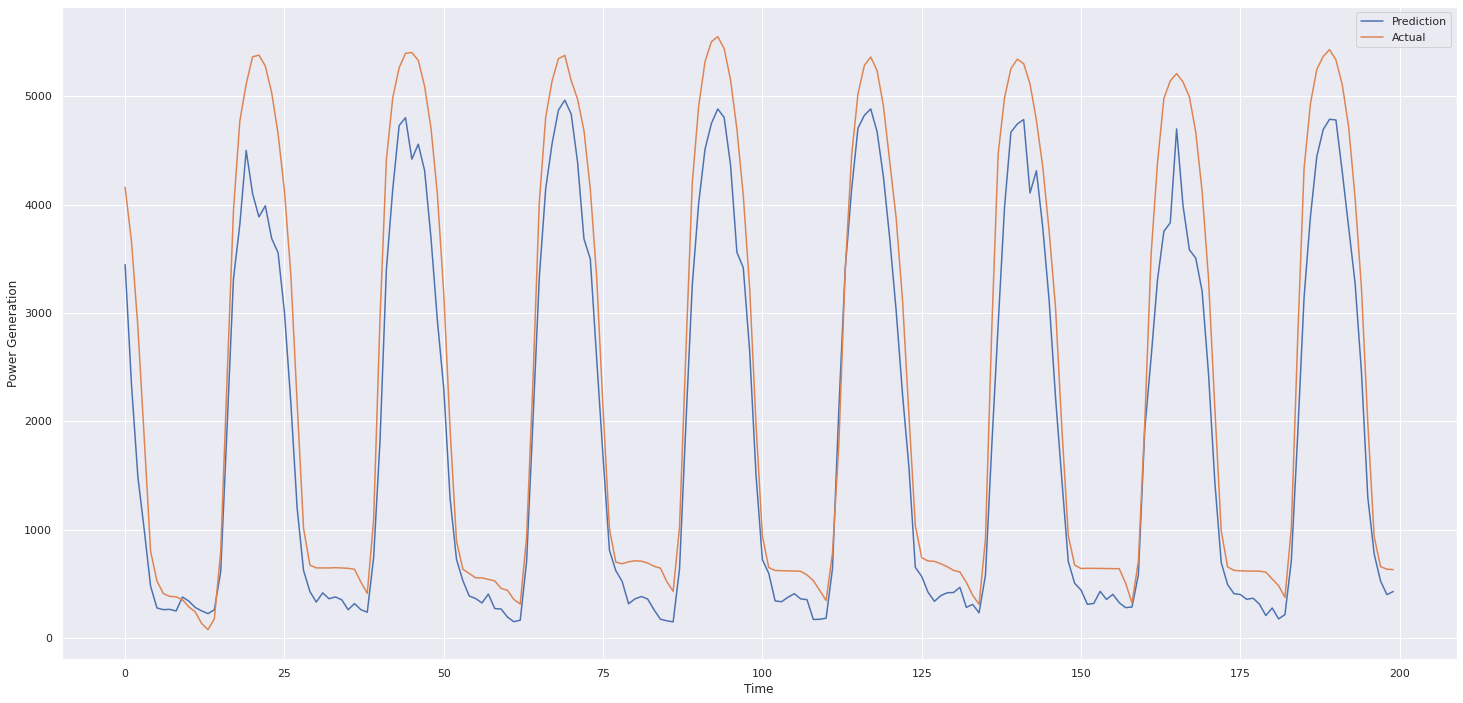

In [ ]:
plt.figure(figsize=(25,12))
# Prediction
plt.plot(x_line[:time_lag], predictions[:time_lag], label='Prediction')
plt.plot(x_line[:time_lag], y_test[:time_lag], label='Actual')
plt.legend(['Prediction', 'Actual'])
plt.xlabel('Time')
plt.ylabel('Power Generation') 


In [ ]:
rand_forest = RandomForestRegressor(n_estimators=1000)
rand_forest.fit(x_train, y_train)

predictions = rand_forest.predict(x_test)

np.mean(np.abs(predictions - y_test))

479.3732742137702

In [ ]:
_# rand_forest = RandomForestRegressor(n_estimators=2500, n_jobs=-1)
# rand_forest.fit(x_train, y_train)

# predictions = rand_forest.predict(x_test)

# np.mean(np.abs(predictions - y_test))

In [ ]:
# plt.figure(figsize=(25,12))
# plt.plot(x_line[:100], predictions[:100])
# plt.plot(x_line[:100], y_test[:100])

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

predictions = lin_reg.predict(x_test)

print("Mean absolute error: ", np.mean(np.abs(predictions - y_test)))

Mean absolute error:  765.8496174036686


In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train[:,:-1], y_train)

predictions = lin_reg.predict(x_test[:,:-1])

print("Mean absolute error: ", np.mean(np.abs(predictions - y_test)))

Mean absolute error:  954.2937786802424


In [ ]:
# Linear reggresion without peak col had 950 mse

In [ ]:
for i in range(len(predictions)):
  if predictions[i] < 0:
    predictions[i] = 0

In [ ]:
print("Mean absolute error: ", np.mean(np.abs(predictions - y_test)))

Mean absolute error:  731.2557553110303


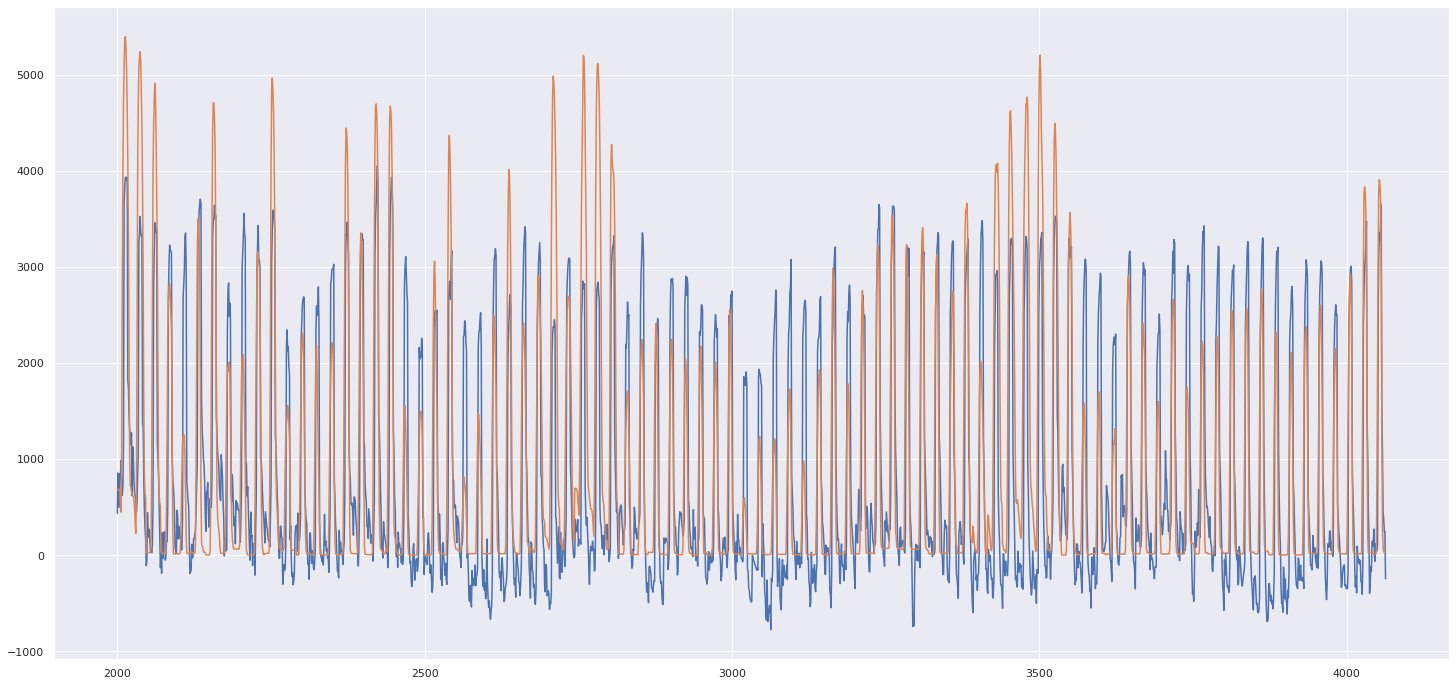

In [ ]:
plt.figure(figsize=(25,12))
plt.plot(x_line[2000:], predictions[2000:])
plt.plot(x_line[2000:], y_test[2000:])

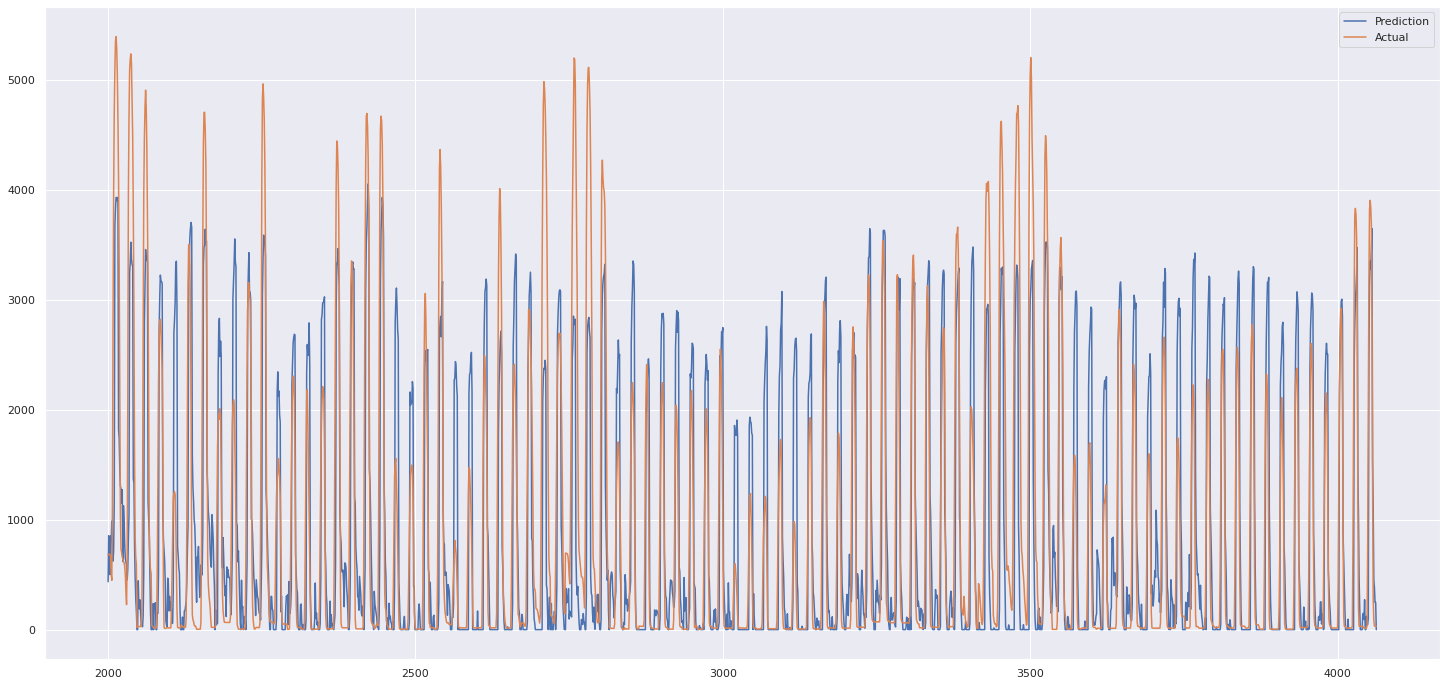

In [ ]:
plt.figure(figsize=(25,12))
plt.plot(x_line[2000:], predictions[2000:])
plt.plot(x_line[2000:], y_test[2000:])
plt.legend(['Prediction', 'Actual'])

In [ ]:
lin_reg = AdaBoostRegressor(base_estimator=GradientBoostingRegressor(), n_estimators=100)
lin_reg.fit(x_train, y_train)

predictions = lin_reg.predict(x_test)

print("Mean absolute error: ", np.mean(np.abs(predictions - y_test)))

Mean absolute error:  565.5074646261414


In [ ]:
!sudo pip install xgboost==1.0.1

     |████████████████████████████████| 109.8MB 85kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
import xgboost
model = xgboost.XGBRegressor(n_estimators=1000, max_depth=50, eta=0.1, subsample=0.7, colsample_bytree=0.8)

In [ ]:
import time

start_time = time.time()
model.fit(x_train, y_train)
print("%s seconds" % ((time.time() - start_time)))
start_time = time.time()
y_pred = model.predict(x_test)
print("%s seconds" % ((time.time() - start_time)))
print("MAE: ", np.mean(np.abs(y_test - y_pred)))

[18:32:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
417.12896752357483 seconds
4.543731927871704 seconds
MAE:  499.29784848711887


In [ ]:
model = xgboost.XGBRegressor(n_estimators=1000, max_depth=200, learning_rate=0.001)

start_time = time.time()
model.fit(x_train, y_train)
print("%s seconds" % ((time.time() - start_time)))
start_time = time.time()
y_pred = model.predict(x_test)
print("%s seconds" % ((time.time() - start_time)))
print("MAE: ", np.mean(np.abs(y_test - y_pred)))

[18:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
364.88558197021484 seconds
2.1062967777252197 seconds
MAE:  653.2785253663232


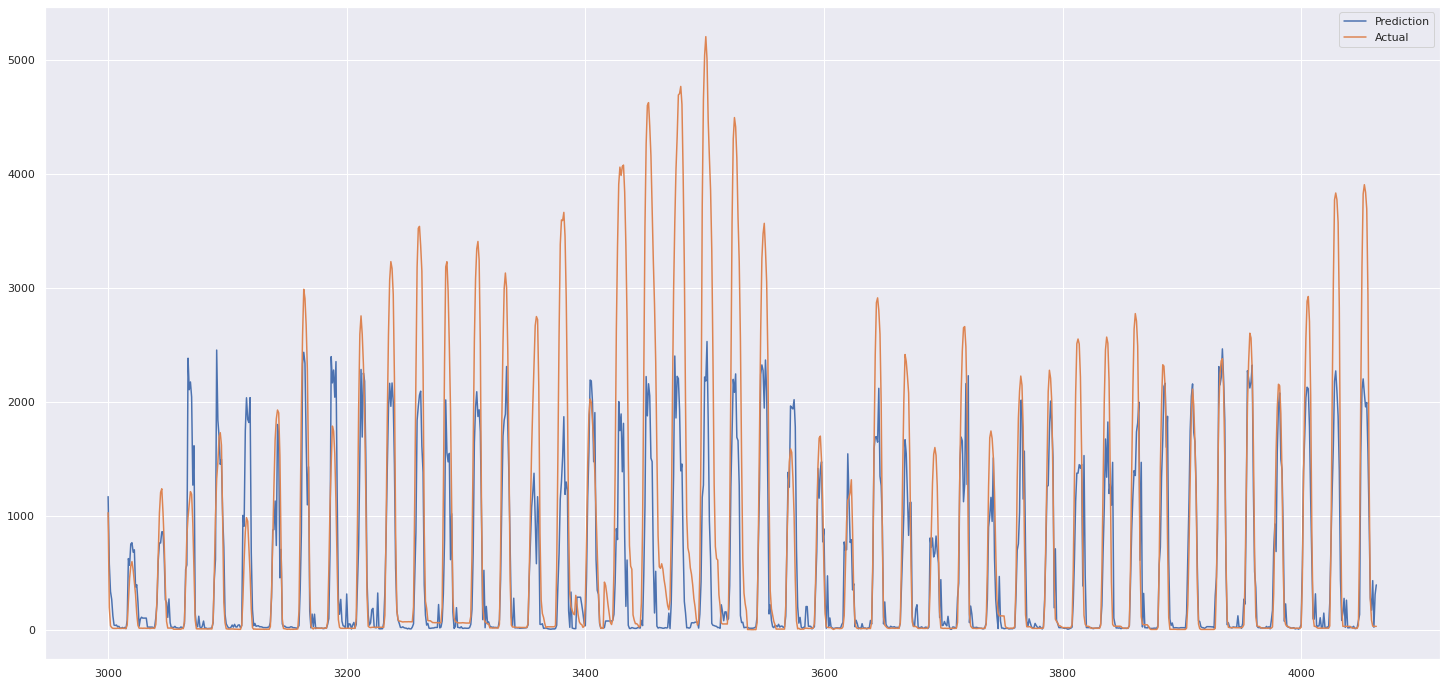

In [ ]:
plt.figure(figsize=(25,12))
plt.plot(x_line[3000:], y_pred[3000:])
plt.plot(x_line[3000:], y_test[3000:])
plt.legend(['Prediction', 'Actual'])

In [ ]:
np.sum((np.abs(y_pred - y_test)) < 30)

847

In [ ]:
model = xgboost.XGBRegressor(n_estimators=2000, max_depth=200, learning_rate=0.01)

start_time = time.time()
model.fit(x_train, y_train)
print("%s seconds" % ((time.time() - start_time)))
start_time = time.time()
y_pred = model.predict(x_test)
print("%s seconds" % ((time.time() - start_time)))
print("MAE: ", np.mean(np.abs(y_test - y_pred)))

[19:13:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
965.9852499961853 seconds
10.09307074546814 seconds
MAE:  480.88516963537285


In [ ]:
from sklearn.ensemble import BaggingRegressor

base_ests = [None, rand_forest]
results = []

for i in base_ests:
  bagging_reg = BaggingRegressor(base_estimator = i, n_estimators=300)
  bagging_reg.fit(x_train, y_train)
  results.append(bagging_reg.predict(x_test))



In [ ]:
from xgboost import XGBRegressor

def xgb_pred(df):
  x_train, y_train, x_test, y_test = split_test_train(df)
  model = XGBRegressor(n_estimators=2000)
  model.fit(x_train, y_train)

  preds = model.predict(x_test)
  return preds

In [ ]:
predicts = xgb_pred(df_final)
np.mean(np.abs(y_test-predicts))

[13:24:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


514.629817429094

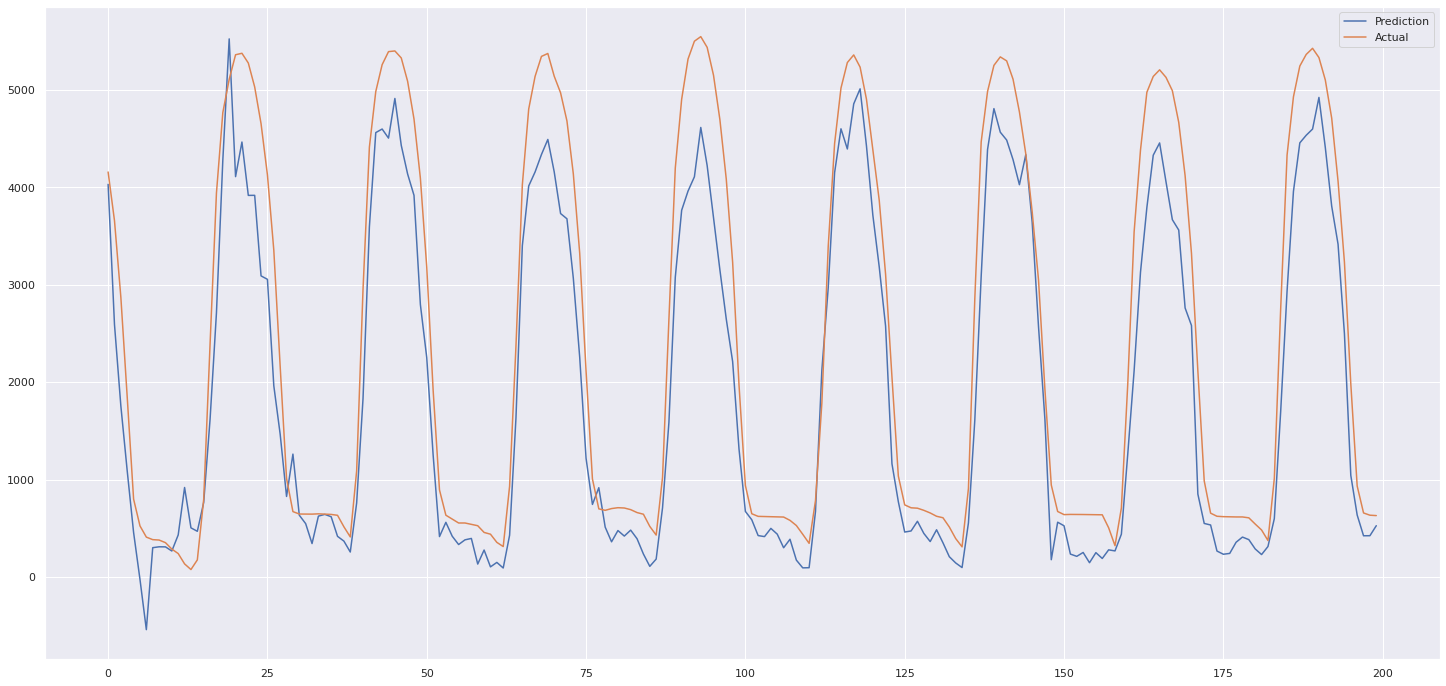

In [ ]:
plt.figure(figsize=(25,12))
plt.plot(x_line[:time_lag], predicts[:time_lag], label='Prediction')
plt.plot(x_line[:time_lag], y_test[:time_lag], label='Actual')
plt.legend(['Prediction', 'Actual'])

In [ ]:
lin_reg = LogisticRegression()
lin_reg.fit(x_train[:,:-1], y_train)

predictions = lin_reg.predict(x_test[:,:-1])

print("Mean absolute error: ", np.mean(np.abs(predictions - y_test)))

ValueError: ignored

In [ ]:
lin_reg = LogisticRegression()
lin_reg.fit(x_train, y_train)

predictions = lin_reg.predict(x_test)

print("Mean absolute error: ", np.mean(np.abs(predictions - y_test)))

ValueError: ignored

In [ ]:
from sklearn.svm import SVC
from sklearn import metrics, svm


clf = svm.SVR()
clf.fit(x_train, y_train)
print("SVR")
predictions = clf.predict(x_test)
print('MAE: ', np.mean(np.abs(predictions - y_test)))

SVR
MAE:  1202.1855846530057


In [ ]:
clf = svm.SVR()
clf.fit(x_train[:,:-1], y_train)
print("SVR")
predictions = clf.predict(x_test[:,:-1])
print('MAE: ', np.mean(np.abs(predictions - y_test)))

SVR
MAE:  1202.0923605363112


In [ ]:
import numpy as np
from sklearn                        import metrics, svm
from sklearn.linear_model           import LinearRegression
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC


clf = LinearRegression()
clf.fit(x_train, y_train)
print("LinearRegression")
print(np.mean(np.abs(clf.predict(x_test) - y_test)))

clf = svm.SVR()
clf.fit(x_train, y_train)
print("SVR")
print(np.mean(np.abs(clf.predict(x_test) - y_test)))


clf = LinearDiscriminantAnalysis()
clf.fit(x_train, y_train)
print("LinearDiscriminantAnalysis")
print(np.mean(np.abs(clf.predict(x_test) - y_test)))

clf = GaussianNB()
clf.fit(x_train, y_train)
print("GaussianNB")
print(np.mean(np.abs(clf.predict(x_test) - y_test)))

clf = SVC()
clf.fit(x_train, y_train)
print("SVC")
print(np.mean(np.abs(clf.predict(x_test) - y_test)))


LinearRegression
765.8496174036686
SVR
1202.1855846530057


ValueError: ignored

In [ ]:
from sklearn import linear_model

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]

for item in classifiers:
    print(item)
    clf = item
    clf.fit(x_train, y_train)
    print(np.mean(np.abs(clf.predict(x_test) - y_test)))


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
1202.1855846530057
SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)
824891657008755.6
BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, alpha_init=None,
              compute_score=False, copy_X=True, fit_intercept=True,
              lambda_1=1e-06, lambda_2=1e-06, lambda_init=None, n_iter=300,
              normalize=False, tol=0.001, verbose=False)
765.9567656909921
LassoLars(alpha=1.0, copy_X=True, eps=2.220446049250313e-16, fit_intercept=True,
          fit_path=True, max_iter=500, normalize=True, 